# Project: Investigate a Dataset - [Medical Appointment No Shows]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
> This dataset collects information from 100k medical appointments in Brazil and is focused on the questions of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.<br>
> ● Be careful about the encoding of the last column [No_show]: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.<br>
> Source: [Kaggle](https://www.kaggle.com/joniarroba/noshowappointments)<br>


### Question(s) for Analysis
> 1. Does a specific age period [age range] considered a factor for affecting the patient show up at the appointment, and which age range have the highest show up at the appointment.
> 2. Does a specific day of the week considered a factor for affecting the patient show up at the appointment, and which day have the highest show up at the appointment.
> 3. Does a specific month considered a factor for affecting the patient show up at the appointment, and which month have the highest show up at the appointment.

In [135]:
# Use this cell to set up import statements for all packages that you plan to use.
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
### In this section of the report, we will load in the data, check for cleanliness, and then trim and clean the dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

Load the data and print out a few lines

In [136]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Check if any null value/s exist in the data

In [137]:
print('The number of row/s in the dataset = {}'
      '\nThe number of column/s in the dataset = {}\n'
      .format(df.shape[0], df.shape[1]))

The number of row/s in the dataset = 110527
The number of column/s in the dataset = 14



Check the columns of the data and observe the number of rows

In [138]:
df.isnull().any()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

Another way to check for null values to use info() function and check that the number in Non-Null Count match the dataset rows count.
> Moreover, we could check the data type of the dataset columns using info() function also.

In [139]:
df.info()
# We can observe from the last two cells that the dataset doesn't contain null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB



### Data Cleaning
#### In this section, we will clean the data in order to be ready for analysis.

We can observe from the Dtype Columns of `ScheduledDay, AppointmentDay` has a date/time information, however it's represent as string in the dataset instead of datetime object.
Let's change the `ScheduledDay, AppointmentDay` columns to date/time object

In [140]:
from datetime import datetime

df['ScheduledDay'] = [datetime.strptime(date, '%Y-%m-%dT%H:%M:%SZ') for date in df['ScheduledDay']]
df['ScheduledDay'].head()

0   2016-04-29 18:38:08
1   2016-04-29 16:08:27
2   2016-04-29 16:19:04
3   2016-04-29 17:29:31
4   2016-04-29 16:07:23
Name: ScheduledDay, dtype: datetime64[ns]

In [141]:
# delete the time from the AppointmentDay column and convert it to date/time object
df['AppointmentDay'] = [datetime.strptime(date, '%Y-%m-%dT%H:%M:%SZ') for date in df['AppointmentDay']]
df['AppointmentDay'].head()

0   2016-04-29
1   2016-04-29
2   2016-04-29
3   2016-04-29
4   2016-04-29
Name: AppointmentDay, dtype: datetime64[ns]

We notice that some column names have different name format, Ex: [SMS_received, No-show], [PatinetId,AppointmentID].
In the next cell, we will rename the columns in order to be in the same format

In [142]:
df.rename(columns={'PatientId': 'Patient_id', 'AppointmentID': 'Appointment_id', 'ScheduledDay': 'Scheduled_day',
                   'AppointmentDay': 'Appointment_day', 'No-show': 'No_show'}, inplace=True)
df.columns

Index(['Patient_id', 'Appointment_id', 'Gender', 'Scheduled_day',
       'Appointment_day', 'Age', 'Neighbourhood', 'Scholarship',
       'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received',
       'No_show'],
      dtype='object')

Now we will change all the columns name to small caps to make it easier to deal with.

In [143]:
df.rename(columns=str.lower, inplace=True)
df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received',
       'no_show'],
      dtype='object')

#### Now our data look cleaner and ready to be analysed in the next section

<a id='eda'></a>
## Exploratory Data Analysis
#### Now that we've trimmed and cleaned our data, we're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that we posed in the Introduction section. We should make sure that we are aiming to answer the questions that we posed, and look for relationships between variables that we think could be related to the questions we are asking.

### Research Question 1
###  Does a specific age period [age range] considered a factor for affecting the patient show up at the appointment, and which age range have the highest show up at the appointment.

#### To decide how to distribute the ages in age range group, We need to explore the age range of the dataset.

In [144]:
# df.groupby('age')['age'].count()
df['age'].unique().min(), df['age'].unique().max()

(-1, 115)

We can observe that the age range contain negative value! which is not possible. As a result, we will drop that rows with a negative age value.

In [145]:
df = df.drop(df[df['age'] < 0].index)
df['age'].min(), df['age'].max()

(0, 115)

#### Now after cleaning the data of the age range, we have to divide the ages `age brackets`.
> children: [0 year - 18 years(excluded)]<br>
> young_adults: [18 years - 30 years(excluded)]<br>
> adults: [30 years - 60 years(excluded)]<br>
> older_adults: [60 years - 116 years(excluded)]

children: [0 year - 18 years(excluded)]

In [146]:
children = df.loc[df['age'] < 18]
children.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
15,9.994839e+10,5620206,F,2016-04-26 08:47:27,2016-04-29,15,NOVA PALESTINA,0,0,0,0,0,1,No
21,1.215484e+13,5628338,F,2016-04-27 10:50:45,2016-04-29,4,CONQUISTA,0,0,0,0,0,0,Yes
22,8.632298e+14,5616091,M,2016-04-25 13:29:16,2016-04-29,13,CONQUISTA,0,0,0,0,0,1,Yes
27,1.215484e+13,5628345,F,2016-04-27 10:51:45,2016-04-29,4,CONQUISTA,0,0,0,0,0,0,No


young_adults: [18 years - 30 years(excluded)]

In [147]:
young_adults = df.loc[(df['age'] >= 18) & (df['age'] < 30)]
young_adults.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
6,7.336882e+14,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No
11,7.542951e+12,5620163,M,2016-04-26 08:44:12,2016-04-29,29,NOVA PALESTINA,0,0,0,0,0,1,Yes
12,5.666548e+14,5634718,F,2016-04-28 11:33:51,2016-04-29,22,NOVA PALESTINA,1,0,0,0,0,0,No


adults: [30 years - 60 years(excluded)]

In [148]:
adults = df.loc[(df['age'] >= 30) & (df['age'] < 60)]
adults.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
7,3.449833e+12,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes
10,7.345362e+14,5630213,F,2016-04-27 14:58:11,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,No
14,9.988472e+13,5633951,F,2016-04-28 10:06:24,2016-04-29,54,NOVA PALESTINA,0,0,0,0,0,0,No


older_adults: [60 years - 116 years(excluded)]

In [149]:
old_adults = df.loc[(df['age'] >= 60) & (df['age'] < df['age'].max() + 1)]
old_adults.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No
24,8.734858e+12,5641780,F,2016-04-29 14:19:19,2016-04-29,65,TABUAZEIRO,0,0,0,0,0,0,No
32,5.288356e+13,5637908,M,2016-04-29 07:30:27,2016-04-29,61,SÃO CRISTÓVÃO,0,1,0,0,0,0,No


#### First, we will determine the proportion of each age group in relation to the entire dataset. By doing this, we can analyze the representation of each age group in the dataset and gain insights into the distribution of ages among the appointments.

In [150]:
# Next, we will determine the proportion of each age group in relation to the entire dataset. By doing this, we can analyze the representation of each age group in the dataset and gain insights into the distribution of ages among the appointments.
children_proportion = len(children) / len(df)
young_adults_proportion = len(young_adults) / len(df)
adults_proportion = len(adults) / len(df)
old_adults_proportion = len(old_adults) / len(df)

print('The proportion of children in the dataset is {:.2f}%'.format(children_proportion * 100))
print('The proportion of young adults in the dataset is {:.2f}%'.format(young_adults_proportion * 100))
print('The proportion of adults in the dataset is {:.2f}%'.format(adults_proportion * 100))
print('The proportion of old adults in the dataset is {:.2f}%'.format(old_adults_proportion * 100))

The proportion of children in the dataset is 24.77%
The proportion of young adults in the dataset is 15.14%
The proportion of adults in the dataset is 40.93%
The proportion of old adults in the dataset is 19.16%


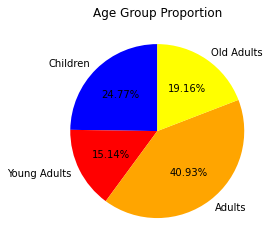

In [151]:
# Plotting the percentages
labels = ['Children', 'Young Adults', 'Adults', 'Old Adults']
sizes = [children_proportion, young_adults_proportion, adults_proportion, old_adults_proportion]
colors = ['blue', 'red', 'orange', 'yellow']

plt.pie(sizes, labels=labels, colors=colors, autopct='%.2f%%', startangle=90)

# Set the title for the graph
plt.title('Age Group Proportion')

# Display the graph
plt.show()

#### Next, we will calculate the percentage of showing up in the appointment for each age group. This will give us an understanding of the attendance rate within each age group.

`children` percentage of showing up in the appointment

In [152]:
# number of children showing up in the appointment
children_show_up_count = children.loc[children['no_show'] == 'No']['no_show'].count()

# proportion of children showing up in the appointment
percentage_show_up = (children_show_up_count / len(children)) * 100
print('The percentage of children showing up in the appointment is {:.2f}%'.format(percentage_show_up))

The percentage of children showing up in the appointment is 78.10%


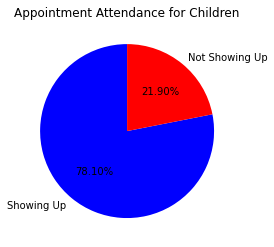

In [153]:
# Plotting the percentages
labels = ['Showing Up', 'Not Showing Up']
sizes = [percentage_show_up, 100 - percentage_show_up]
colors = ['blue', 'red']

plt.pie(sizes, labels=labels, colors=colors, autopct='%.2f%%', startangle=90)

# Set the title for the graph
plt.title('Appointment Attendance for Children')

# Display the graph
plt.show()

The above visualization will be used many times in the next sections, so we will create a function to plot the percentages of showing up in the appointment for each age group.

In [154]:
def appointment_attendance_plot(percentage_show_up):
    """
    Plot the percentages of showing up in the appointment for each age group.
    """
    # Plotting the percentages
    labels = ['Showing Up', 'Not Showing Up']
    sizes = [percentage_show_up, 100 - percentage_show_up]
    colors = ['blue', 'red']

    plt.pie(sizes, labels=labels, colors=colors, autopct='%.2f%%', startangle=90)

    # Set the title for the graph
    plt.title('Appointment Attendance')

    # Display the graph
    plt.show()

`young_adults` percentage of showing up in the appointment

In [155]:
# number of Young Adults showing up in the appointment
young_adults_show_up_count = young_adults.loc[young_adults['no_show'] == 'No']['no_show'].count()

# proportion of Young Adults showing up in the appointment
percentage_show_up = (young_adults_show_up_count / len(young_adults)) * 100
print('The percentage of young adults showing up in the appointment is {:.2f}%'.format(percentage_show_up))

The percentage of young adults showing up in the appointment is 75.35%


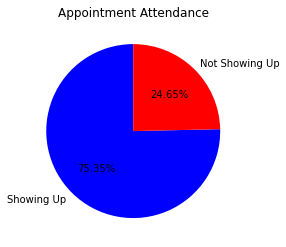

In [156]:
appointment_attendance_plot(percentage_show_up)

`adults` percentage of showing up in the appointment

In [157]:
# number of Adults showing up in the appointment
adults_show_up_count = adults.loc[adults['no_show'] == 'No']['no_show'].count()

# proportion of Adults showing up in the appointment
percentage_show_up = (adults_show_up_count / len(adults)) * 100
print('The percentage of adults showing up in the appointment is {:.2f}%'.format(percentage_show_up))

The percentage of adults showing up in the appointment is 80.20%


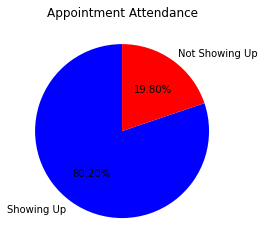

In [158]:
appointment_attendance_plot(percentage_show_up)

`old_adults` percentage of showing up in the appointment

In [159]:
# number of Adults showing up in the appointment
old_adults_show_up_count = old_adults.loc[old_adults['no_show'] == 'No']['no_show'].count()

# proportion of Adults showing up in the appointment
percentage_show_up = (old_adults_show_up_count / len(old_adults)) * 100
print('The percentage of old adults showing up in the appointment is {:.2f}%'.format(percentage_show_up))

The percentage of old adults showing up in the appointment is 84.69%


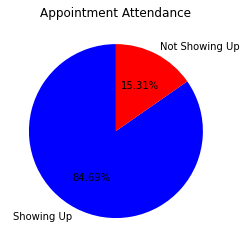

In [160]:
appointment_attendance_plot(percentage_show_up)

### From the above diagrams, We can observe the following:
> `old adults` have the best percentage of showing up at the appointment `84.69% of showing up at the appointment`
> `young adults` have the highest percentage of not showing up at the appointment `24.65% of not showing up at the appointment`

### Research Question 2
### What is the day of the week when the highest number of patients show up for appointments, and which day of the week has the lowest number of patients showing up for appointments?

In [161]:
# review the dataset
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


To make it easy to answer the above question, we will create a new column `appointment_day_of_week` that will contain the day of the week for each appointment.

In [162]:
df['appointment_day_of_week'] = df['appointment_day'].dt.day_name()

# review the dataset
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,appointment_day_of_week
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday


In [163]:
# change the location of the day_of_week column to be after the appointment_day column
column_names = df.columns.tolist()
column_names.insert(5, column_names.pop(column_names.index('appointment_day_of_week')))
df = df.reindex(columns=column_names)

# review the dataset
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,appointment_day_of_week,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,Friday,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,Friday,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,Friday,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,Friday,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,Friday,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Now after cleaning our data, we will calculate the number of patients showing up for appointments for each day of the week.

In [164]:
day_show = df.groupby(['appointment_day_of_week', 'no_show'])['no_show'].count().unstack()
day_show

no_show,No,Yes
appointment_day_of_week,,
Friday,14982,4037
Monday,18024,4690
Saturday,30,9
Thursday,13909,3338
Tuesday,20488,5152
Wednesday,20774,5093


Now we need to find the proportion of patients showing up for appointments for each day of the week.

In [165]:
# proportion of patients showing up for appointments for each day of the week
day_show['showing_up_proportion %'] = round((day_show['No'] / (day_show['No'] + day_show['Yes']) * 100), 2)
day_show['not_showing_up_proportion %'] = round((day_show['Yes'] / (day_show['No'] + day_show['Yes']) * 100), 2)

day_show

no_show,No,Yes,showing_up_proportion %,not_showing_up_proportion %
appointment_day_of_week,,,,
Friday,14982,4037,78.77,21.23
Monday,18024,4690,79.35,20.65
Saturday,30,9,76.92,23.08
Thursday,13909,3338,80.65,19.35
Tuesday,20488,5152,79.91,20.09
Wednesday,20774,5093,80.31,19.69


Now we will sort the value of showing up to find the day with the highest number of patients showing up for appointments

In [166]:
day_show.sort_values(by=['showing_up_proportion %'], ascending=False)

no_show,No,Yes,showing_up_proportion %,not_showing_up_proportion %
appointment_day_of_week,,,,
Thursday,13909,3338,80.65,19.35
Wednesday,20774,5093,80.31,19.69
Tuesday,20488,5152,79.91,20.09
Monday,18024,4690,79.35,20.65
Friday,14982,4037,78.77,21.23
Saturday,30,9,76.92,23.08


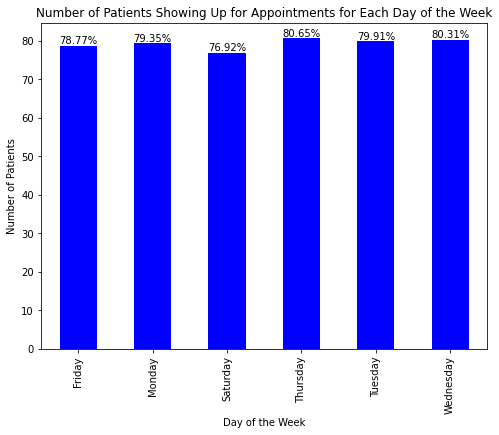

In [167]:
# Plotting the number of showing_up_proportion % for each day of the week
day_show_plot = day_show['showing_up_proportion %'].plot(kind='bar', figsize=(8, 6), color='blue')

# Adding value labels to each bar
for p in day_show_plot.patches:
    day_show_plot.annotate(str(p.get_height()) + '%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center',
                           va='bottom')

# Set the title for the graph
plt.title('Number of Patients Showing Up for Appointments for Each Day of the Week')

# Set the x-label for the graph
plt.xlabel('Day of the Week')

# Set the y-label for the graph
plt.ylabel('Number of Patients')

# Display the graph
plt.show()

From the above diagram, We can observe that `Thursday` has the `highest percentage of patients showing up for appointments 80.65%`

We can rewrite the above code in a function to make it easy to use it again.

In [168]:
def plot_bar_chart(df, column, plot_type, x, y, title, xlabel, ylabel, color):
    plot = df[column].plot(kind=plot_type, figsize=(8, 6), color=color)

    for p in plot.patches:
        plot.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

Now we will sort the value of not showing up to find the day with the lowest number of patients showing up for appointments

In [169]:
day_show.sort_values(by=['not_showing_up_proportion %'], ascending=False)

no_show,No,Yes,showing_up_proportion %,not_showing_up_proportion %
appointment_day_of_week,,,,
Saturday,30,9,76.92,23.08
Friday,14982,4037,78.77,21.23
Monday,18024,4690,79.35,20.65
Tuesday,20488,5152,79.91,20.09
Wednesday,20774,5093,80.31,19.69
Thursday,13909,3338,80.65,19.35


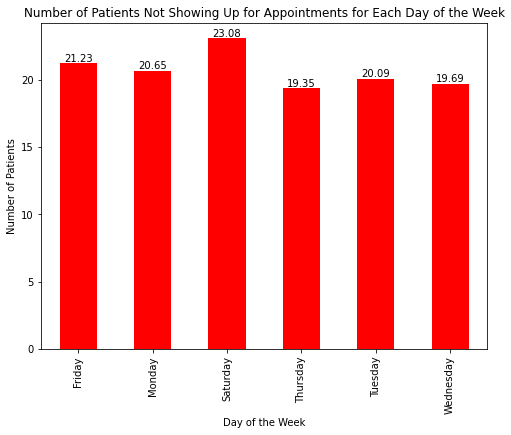

In [170]:
plot_bar_chart(day_show, 'not_showing_up_proportion %', 'bar', 'Day of the Week',
               'Number of Patients', 'Number of Patients Not Showing Up for Appointments for Each Day of the Week',
               'Day of the Week', 'Number of Patients', 'red')

From the above diagram, We can observe that `Saturday` has the `highest percentage of patients not showing up for appointments 23.08%`

### Research Question 3
### What is the month when the highest number of patients show up for appointments, and which month has the lowest number of patients showing up for appointments?

In [171]:
# review the dataset
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,appointment_day_of_week,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,Friday,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,Friday,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,Friday,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,Friday,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,Friday,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [172]:
# extract the month from the appointment_day column and group the data by the month
month_show = df.groupby([df['appointment_day'].dt.month, 'no_show'])['no_show'].count().unstack()
month_show

no_show,No,Yes
appointment_day,,
4,2602,633
5,64037,16804
6,21568,4882


In [173]:
# change the index of the month_show dataframe to be the month name
month_show.index = ['April', 'May', 'June']
month_show

no_show,No,Yes
April,2602,633
May,64037,16804
June,21568,4882


Now we need to find the proportion of patients showing up for appointments for each month.

In [174]:
# proportion of patients showing up for appointments for each month
month_show['showing_up_proportion %'] = round((month_show['No'] / (month_show['No'] + month_show['Yes']) * 100), 2)
month_show['not_showing_up_proportion %'] = round((month_show['Yes'] / (month_show['No'] + month_show['Yes']) * 100), 2)

month_show

no_show,No,Yes,showing_up_proportion %,not_showing_up_proportion %
April,2602,633,80.43,19.57
May,64037,16804,79.21,20.79
June,21568,4882,81.54,18.46


Now we will sort the value of showing up to find the month with the `highest number of patients showing up for appointments`

In [175]:
month_show.sort_values(by=['showing_up_proportion %'], ascending=False)

no_show,No,Yes,showing_up_proportion %,not_showing_up_proportion %
June,21568,4882,81.54,18.46
April,2602,633,80.43,19.57
May,64037,16804,79.21,20.79


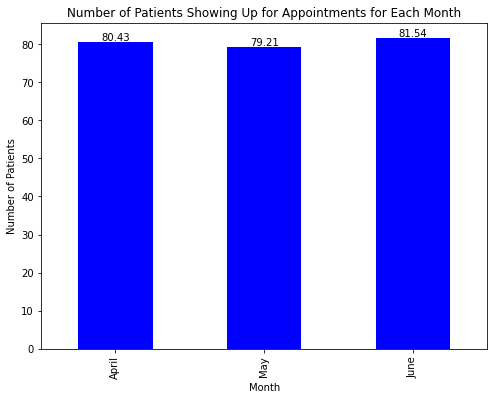

In [176]:
plot_bar_chart(month_show, 'showing_up_proportion %', 'bar', 'Month',
               'Number of Patients', 'Number of Patients Showing Up for Appointments for Each Month',
               'Month', 'Number of Patients', 'blue')

From the above diagram, We can observe that `June` has the `highest percentage of patients showing up for appointments 81.54%`

Now we will sort the value of not showing up to find the month with the `lowest number of patients showing up for appointments`

In [177]:
month_show.sort_values(by=['not_showing_up_proportion %'], ascending=False)

no_show,No,Yes,showing_up_proportion %,not_showing_up_proportion %
May,64037,16804,79.21,20.79
April,2602,633,80.43,19.57
June,21568,4882,81.54,18.46


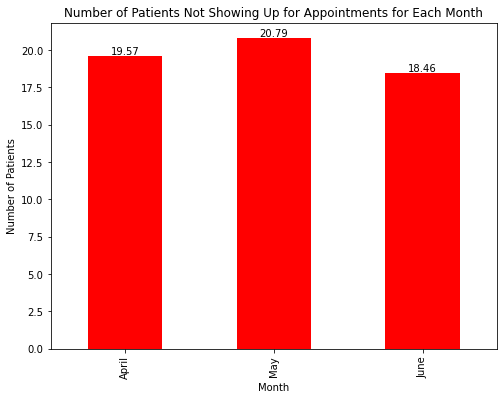

In [178]:
plot_bar_chart(month_show, 'not_showing_up_proportion %', 'bar', 'Month',
               'Number of Patients', 'Number of Patients Not Showing Up for Appointments for Each Month',
               'Month', 'Number of Patients', 'red')

From the above diagram, We can observe that `May` has the `highest percentage of patients not showing up for appointments 20.79%`

<a id='conclusions'></a>
# Conclusion

### Findings:
> 1. `old adults` have the `highest percentage` of `showing up` at the appointment `84.69% of showing up at the appointment`
> 2. `young adults` have the `highest percentage` of `not showing up` at the appointment `24.65% of showing up at the appointment`
> 3. `Thursday` has the `highest percentage` of patients `showing up` for appointments `80.65%`
  > 4. `Saturday` has the `highest percentage` of patients `not showing up` for appointments `23.08%`
   > 5. `June` has the `highest percentage` of patients `showing up` for appointments `81.54%`
   > 6. `May` has the `highest percentage` of patients `not showing up` for appointments `20.79%`

### Limitations:
   1. The dataset doesn't have a lot of information about the appointment, as a result we can't make a lot of analysis, and we can't find the reason why the patients are not showing up for appointments.
        > Example of missing information such as:
      > 1. Which clinic is the appointment in.
      > 2. Which hospital is the appointment in.

    2. Regarding SMS messages, the time of sending the SMS message is not mentioned in the dataset, so we can't judge that SMS messages is consider as reason for not showing up for appointments.
